# Comprehensive Analysis of External Events on Gasoline Prices

## Objective
This notebook aims to explore the impacts of significant geopolitical and economic events, as well as global health crises, on gasoline prices. Specifically, it analyzes the effects of the Iraq War in 2003, the 2008 financial crisis, and the COVID-19 pandemic.

## Data Loading and Preprocessing
- **Data Sources**: Separate CSV files for Regular, Midgrade, and Premium gasoline prices.
- **Preprocessing Steps**:
  - Load and clean data from CSV files.
  - Merge datasets on the 'Date' field.
  - Calculate the average price across the three gasoline grades for a comprehensive view.

## Analysis Overview
### Events Analyzed
1. **Iraq War (2003)**:
   - Time Frame: January 2003 to December 2003.
   - Objective: Assess the impact of geopolitical instability in an oil-producing region on global oil markets.

2. **2008 Financial Crisis**:
   - Time Frame: December 2007 to June 2009.
   - Objective: Analyze the effects of a major economic downturn on consumer demand and gasoline prices.

3. **COVID-19 Pandemic**:
   - Time Frame: January 2020 to December 2021 (adjust end date based on data availability).
   - Objective: Examine the influence of a global health crisis on mobility and fuel consumption patterns.

### Methodology
- **Data Filtering**: Isolate data for the months surrounding each event.
- **Visualization**: Plot the average gasoline prices across grades during these events to compare with overall trends.

## Results
- **Iraq War (2003)**: Indicated fluctuations likely due to geopolitical tensions affecting oil supply.
- **2008 Financial Crisis**: Showed significant declines in gasoline prices reflecting decreased global demand.
- **COVID-19 Pandemic**: Revealed changes in gasoline consumption patterns due to lockdowns and reduced travel.

## Conclusion
This analysis highlights the substantial impacts of external events on energy prices, providing crucial insights for stakeholders in economic planning, energy markets, and policy-making.

## Next Steps
- Extend analysis to other significant events such as additional geopolitical conflicts or technological breakthroughs in energy sectors.
- Conduct deeper regional analysis to understand localized impacts better.
- Explore long-term economic impacts on energy policies and consumer behavior in response to global crises.



C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2351975019.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2351975019.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2351975019.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


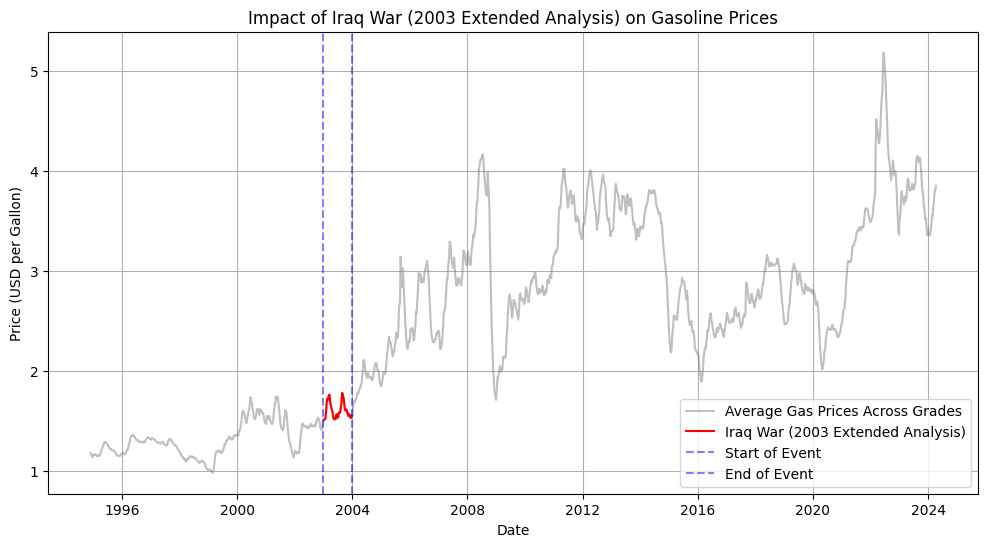

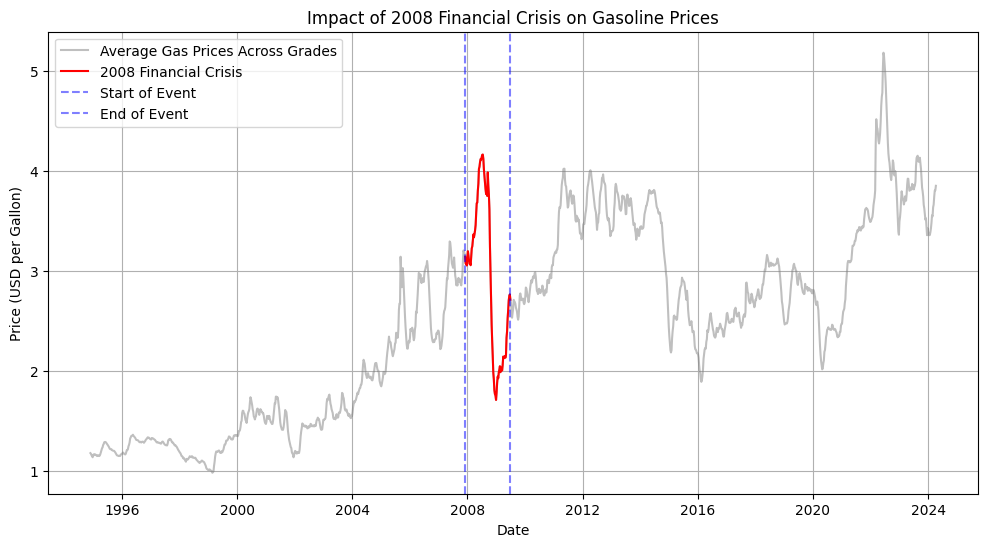

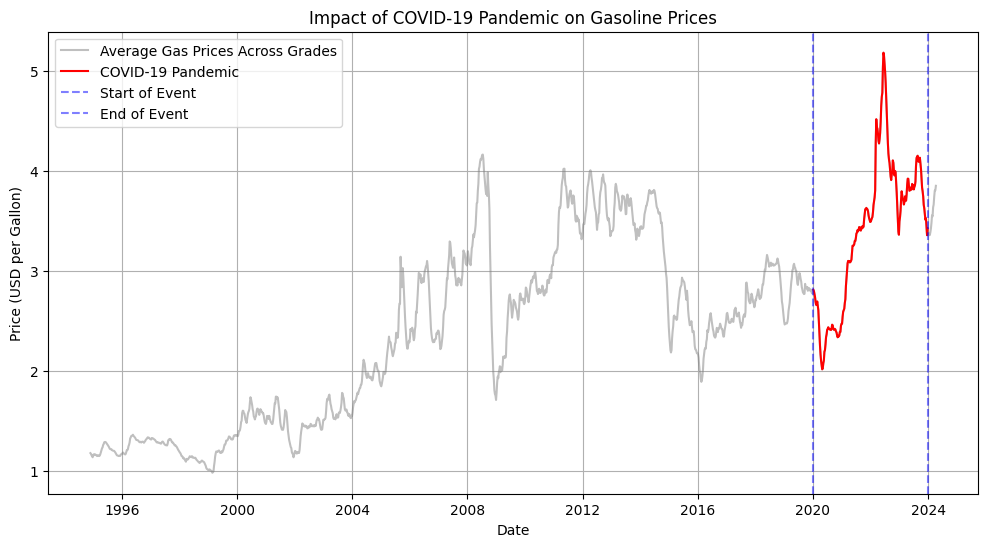

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_data(file_path):
    data = pd.read_csv(file_path, skiprows=1)
    data.columns = ['Date', 'National Average'] + ['Region_' + str(i) for i in range(1, 21)]
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['National Average'] = pd.to_numeric(data['National Average'], errors='coerce')
    return data

# Load data for Regular, Midgrade, and Premium
data_regular = load_data('Data\Data1_Regular_Conventional.csv')
data_midgrade = load_data('Data\Data4_Midgrade_Conventional.csv')
data_premium = load_data('Data\Data7_Premuim_Conventional.csv')

# Merge the data 
data_merged = pd.merge(data_regular, data_midgrade, on='Date', suffixes=('_reg', '_mid'))
data_merged = pd.merge(data_merged, data_premium, on='Date')
data_merged['Average Price'] = data_merged[['National Average_reg', 'National Average_mid', 'National Average']].mean(axis=1)

iraq_war_start, iraq_war_end = '2003-01-01', '2003-12-31'
financial_crisis_start, financial_crisis_end = '2007-12-01', '2009-06-30'
covid_start, covid_end = '2020-01-01', '2023-12-31'  
# Function to plot data
def plot_price_impact(data, event_name, start_date, end_date):
    event_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Average Price'], label='Average Gas Prices Across Grades', color='grey', alpha=0.5)
    plt.plot(event_data['Date'], event_data['Average Price'], color='red', label=event_name)
    plt.title(f'Impact of {event_name} on Gasoline Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per Gallon)')
    plt.axvline(x=pd.to_datetime(start_date), color='blue', linestyle='--', alpha=0.5, label='Start of Event')
    plt.axvline(x=pd.to_datetime(end_date), color='blue', linestyle='--', alpha=0.5, label='End of Event')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for the Iraq War, 2008 Financial Crisis, and COVID-19 Pandemic
plot_price_impact(data_merged, 'Iraq War (2003 Extended Analysis)', iraq_war_start, iraq_war_end)
plot_price_impact(data_merged, '2008 Financial Crisis', financial_crisis_start, financial_crisis_end)
plot_price_impact(data_merged, 'COVID-19 Pandemic', covid_start, covid_end)
